# Decision Trees

De **supervised learning** techniek Decision Trees voor **classificatie** is iets dat je zelf al goed kent.
Je gebruikt ze namelijk zelf onbewust wanneer je een voorwerp moet identificeren.
Waar let je bijvoorbeeld op om het onderstaande stuk fruit te identificeren?

![apple](images\apple.png)

Hier zou je bijvoorbeeld op de volgende karakteristieken of features gelet kunnen hebben:
* Hoe rood is het stuk fruit?
* Hoe rond is het stuk fruit
* Hoeveel weegt het stuk fruit?

Mentaal bouw je dus onbewust een boom op en overloop je een reeks opties om te bepalen of het object waar je naar kijkt een appel is of niet.

Dit is net hetgene dat er ook gebruikt bij het opbouwen van een decision tree.
Een voorbeeld van de werking van deze classifier is als volgt:

In [12]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# graphical
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets

%matplotlib inline

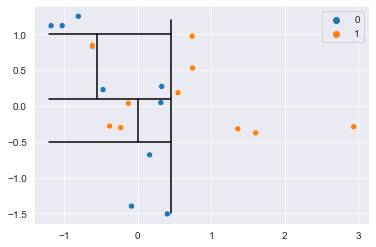

In [14]:
# maakt de dataset
X, y = datasets.make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, class_sep=0.3, random_state=123)

sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)
plt.plot([0.45, 0.45], [-1.5, 1.2], color="black")
plt.plot([-1.2, 0.45], [-0.5, -0.5], color="black")
plt.plot([-1.2, 0.45], [1.0, 1.0], color="black")
plt.plot([-1.2, 0.45], [0.1, 0.1], color="black")
plt.plot([-0.55, -0.55], [0.1, 1.0], color="black")
plt.plot([0, 0], [0.1, -0.5], color="black")

Voor bovenstaande voorbeeld kan bijvoorbeeld deze boom opgebouwd worden die de classificatie doet:

![boom](images\boom.png)

## Bepalen scheidingslijnen

Hierboven hebben we zelf de lijnen getrokken om het gebied in twee te verdelen.
Nu rest er nog de vraag, hoe kiezen we de beste lijnen om deze verdeling te doen.
Intuitief denk je dan aan de lijn die het grootste aantal observaties van dezelfde klasse afsplitst. 
Of de lijn die het minste fouten maakt.

Deze intuitieve benadering komt sterk overeen met het berekenen van de entropie en deze proberen zo laag mogelijk te krijgen.
Entropie is een maat voor de wanorde/chaos in een systeem en wordt gebruikt in een aantal wetenschappelijke disciplines zoals chemie en fysica maar ook in computerwetenschappen bij bijvoorbeeld encryptie en compressie. 
Hoe hoger de entropie in een bepaald systeem, hoe hoger de wanorde/chaos en bijvoorbeeld hoe beter de encryptie.
De entropie van een classificatieprobleem kan als volgt bepaald worden:

$H = \sum\limits_{i=1}^{N} p_i \log_2(\frac{1}{p_i}) = -\sum\limits_{i=1}^{N} p_i \log_2(p_i)$

waar $p_i$ het percentage observaties van klasse $i$ is in het gebied.

De entropie van de beginsituatie in bovenstaand voorbeeld en na de eerste split kan berekend worden als volgt:

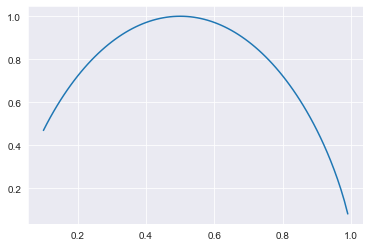

In [16]:
x = np.arange(0.1,1,0.01)
y = x * np.log2(x) + (1-x) * np.log2(1-x)
plt.plot(x,-y)

In [18]:
pBeginKlasse0 = 9/19 # blauwe punten
pBeginKlasse1 = 10/19 # orange punten

entropieBegin = - (pBeginKlasse0 * np.log2(pBeginKlasse0) + pBeginKlasse1 * np.log2(pBeginKlasse1))
print(pBeginKlasse0, pBeginKlasse1, entropieBegin)
# Dit geeft een zeer hoge entropie voor in het begin.

pLinksKlasse0 = 9/13
pLinksKlasse1 = 4/13
pRechtsKlasse0 = 0.0000001 # Dit moet 0 zijn maar zou eindigen in min oneindig. (vandaar een minieme waarde)
pRechtsKlasse1 = 6/6

entropieRechts = - (pRechtsKlasse0 * np.log2(pRechtsKlasse0) + pRechtsKlasse1 * np.log2(pRechtsKlasse1))
print(pRechtsKlasse0, pRechtsKlasse1, entropieRechts)
entropieLinks = - (pLinksKlasse0 * np.log2(pLinksKlasse0) + pLinksKlasse1 * np.log2(pLinksKlasse1))
print(pLinksKlasse0, pLinksKlasse1, entropieLinks)
informationGain = entropieBegin - 6/19 * entropieRechts - 13/19 * entropieLinks
print("Information Gain = ", informationGain)

0.47368421052631576 0.5263157894736842 0.9980008838722996
1e-07 1.0 2.3253496664211536e-06
0.6923076923076923 0.3076923076923077 0.8904916402194913
Information Gain =  0.3887163957169635


Na het berekenen van de gewenste information gain voor alle splits die je kan doen, moet je de beste kiezen. 
Hiervoor kiezen we dan degene die de grootste hoeveelheid informatie toevoegt.

Er is echter een groot nadeel aan het gebruik van de entropie.
Het veelvuldig berekenen van de logaritmes voor alle mogelijke verdeling is zeer rekenintensief.
Daarom is het beter om gebruik te maken van een alternatieve methode om de scheidingslijn te bepalen.
Deze methode noemt de Gini impurity methode en is default gekozen bij de Decision Tree algoritmes van sklearn.
De Gini impurity focust meer op de zuiverheid van de verdeling en minder op de entropie en kan berekend worden als volgt:

$G = 1 - \sum\limits_{i=1}^{N}p_i^2$

Om nu de beste verdelingslijn te zoeken neem je de lijn die leidt tot de kleinste Gini impurity.
Let er wel op dat je het gewogen gemiddelde neemt van de twee delen om de Gini impurity waarden te vergelijken.
De berekening van de Gini Impurity voor de eerste verdeling van bovenstaande voorbeeld gaat als volgt:

In [19]:
GLinks = 1 - pLinksKlasse0**2 - pLinksKlasse1**2
GRechts = 1 - pRechtsKlasse0**2 - pRechtsKlasse1**2
G = 13/19*GLinks + 6/19*GRechts
print(G)

0.29149797570849884


Net zoals bij de voorgaande machine learning technieken hebben ook Decision Trees hun voor en nadelen.
De nadelen zijn:
* Grote neiging tot overfitting
* Gevoelig aan ruis
* Boom kan zeer groot worden

Het vordeel van een decision tree is dat het een zeer snelle en eenvoudige techniek is die snel een resultaat kan leveren maar het belangrijkste voordeel waardoor het nog steeds vaak gebruikt wordt is dat je op het resulterende model kan redeneren.
Dat wil zeggen dat je kan kijken welke features de grootste impact hebben op het resultaat, waar de verdelingslijnen geplaatst worden en waarom. 
Deze redenering en analyse kan dan gebruikt worden om je processen eventueel te verbeteren. 

Hoewel Decision Trees gevoelig zijn aan overfitting zijn er een groot aantal manieren om regularisatie toe te voegen aan het algoritme.
De belangrijkste hyperparameters om dit te doen zijn:
* max_depth: Beperk de maximale diepte van de boom
* min_samples_split: Laat geen verdelingen toe van gebieden met minder observaties dan deze waarde. De klasse van het gebied komt dan overeen met de meerderheid van de observaties
* min_samples_leaf: Minimum aantal observaties als blad van de boom

Train nu een [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) op de borstkanker dataset van sklearn.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer(as_frame=True)
display(cancer["frame"].head())

# train test split
X = cancer["frame"].drop("target", axis=1)
y = cancer["frame"].target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

# make decision tree classifier
clf = DecisionTreeClassifier()

# train en predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# toon score
print("Acc train data", clf.score(X_train, y_train))
print("Acc test data", clf.score(X_test, y_test))

# toon belangrijke features 
print(clf.feature_importances_)
for idx, val in enumerate(clf.feature_importances_):
    if val == np.max(clf.feature_importances_):
        print("Most important feature =", cancer.data.columns[idx], "with index: ", idx)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Acc train data 1.0
Acc test data 0.8557504873294347
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07130125 0.         0.02275349 0.04991087 0.
 0.         0.         0.         0.78752228 0.06851211 0.        ]
Most important feature = worst concave points with index:  27


# Random Forests

Een andere manier om overfitting van decision trees tegen te gaan en het resultaat accurater te maken is door gebruik te maken van Random Forests.
Deze techniek gaat meerdere decision trees trainen en door gebruik van majority voting alle trees laten stemmen over het uiteindelijke resultaat.
Buiten het vermijden van problemen door overfitting kan deze techniek ook veel accurater zijn.
Algemeen gezien kan men zelfs er van uitgaan dat hoe meer trees er gebruikt worden hoe accurater het forest wordt.

Omdat we meerdere bomen gebruiken willen we ook meer variatie in de modellen die deze bomen leren.
Daarom wordt elke boom maar op een willekeurig deel van de data getrained (vandaar de term random).

Buiten de hyperparameters die voor de decision trees gebruikt kunnen worden zijn er nog een aantal extra zaken die de performantie van het gecombineerde forest sterk kan verbeteren, namelijk:
* n_estimators: Het aantal bomen dat gebruikt wordt (Hoe meer bomen hoe accurater maar ook hoe meer rekenkracht)
* max_features: Aantal features per boom (int, float, sqrt / auto, log2, default). Hoe meer features, hoe meer kans op overfitting
* Bootstrap aggregating of bagging: Dit houdt in dat maar een deel van de observaties gebruikt worden om elke boom te trainen. Zo kan er meer variatie geintroduceerd worden.
* oob_score: Out-of-Bag score: Het trainen van een decision tree gebruikt niet alle trainingsdata dus kan je de niet-gebruikte data gebruiken als validatieset voor die boom. Meer informatie vind je [hier](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)

Waarom zou je een Random Forest Classifier verkiezen boven een classifier gebaseerd op Logistic Regression of SVM?
Random forest classifiers hebben de volgende voordelen:
* Ze zijn zeer goed in te stellen
* Ze vragen niet veel rekenkracht
* Hun accuraatheid is gelijk aan dat van SVM of zelfs beter
* Het voordeel van decision trees dat er kan geredeneerd worden op welke features belangrijk zijn blijft behouden. 

Net zoals voor de vorige classifiers kan ook deze techniek gebruikt worden voor regressie.
In dit geval moet er gebruik gemaakt worden van het gemiddelde in plaats van majority voting.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# create random forest classifier
clf = RandomForestClassifier(n_estimators=1)

# train en predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# score
print("Acc train data", clf.score(X_train, y_train))
print("Acc test data", clf.score(X_test, y_test))

# toon belangrijke features 
print(clf.feature_importances_)
for idx, val in enumerate(clf.feature_importances_):
    if val == np.max(clf.feature_importances_):
        print("Most important feature =", cancer.data.columns[idx], "with index: ", idx)

Acc train data 0.9642857142857143
Acc test data 0.8226120857699805
[0.         0.         0.         0.52492047 0.         0.
 0.         0.05533597 0.         0.         0.         0.03154901
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11492855
 0.         0.         0.16786416 0.         0.10540184 0.        ]
Most important feature = mean area with index:  3


Train nu meerdere random-forest classifiers waar je het aantal estimators laat toenemen (bvb tot 100).
Toon een plot met de trainings en test error in functie van het aantal estimators.